In [2]:
import pandas as pd

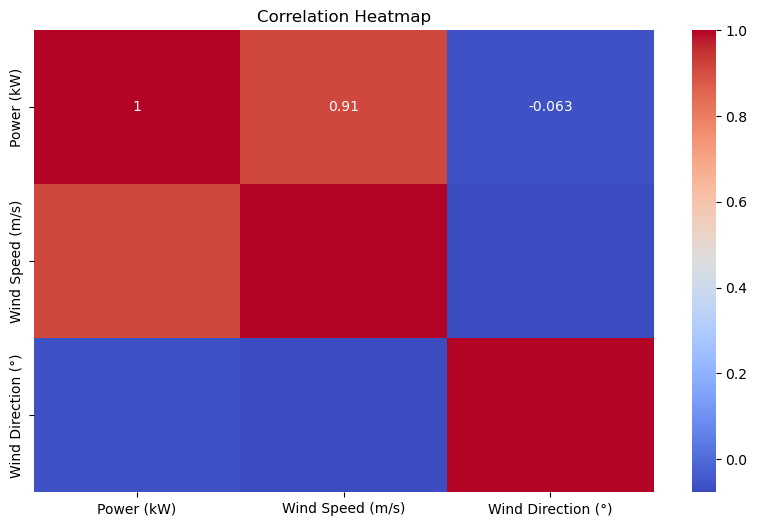

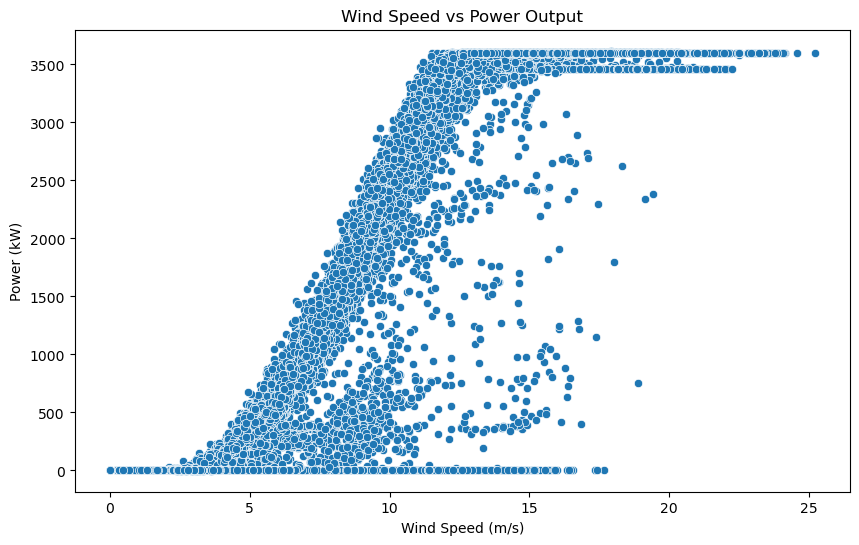

Model score: 0.8545
Model score: 0.8503


c:\Users\msalm\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model score: 0.9426


c:\Users\msalm\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.142e+09, tolerance: 5.077e+06
  model = cd_fast.enet_coordinate_descent(


Best Lasso parameters: {'lasso__alpha': 0.1, 'polynomialfeatures__degree': 8, 'polynomialfeatures__include_bias': False}
Best Lasso score: 0.9553093581206606


c:\Users\msalm\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.226e+09, tolerance: 5.077e+06
  model = cd_fast.enet_coordinate_descent(


Best ElasticNet parameters: {'elasticnet__alpha': 0.001, 'elasticnet__l1_ratio': 0.1, 'polynomialfeatures__degree': 8, 'polynomialfeatures__include_bias': False}
Best ElasticNet score: 0.9553553036566601
Best SVR parameters: {'svr__C': 5, 'svr__epsilon': 0.1}
Best SVR score: 0.955797662860229


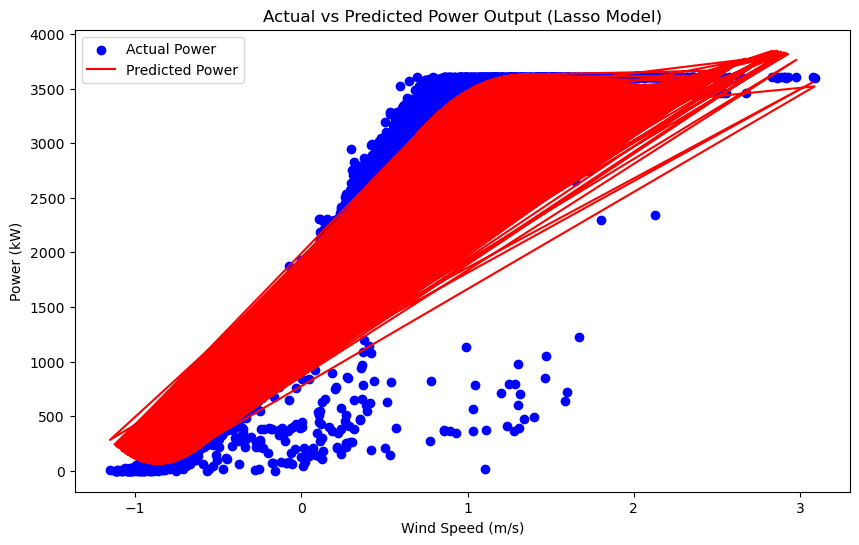

The best model after tuning is Lasso with the following hyperparameters:
{'lasso__alpha': 0.1, 'polynomialfeatures__degree': 8, 'polynomialfeatures__include_bias': False}
Final R2 score on test set: 0.9513095938733355


In [3]:
# Wind Farm Electricity Production Prediction

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# Load the dataset from local files
wind_turbine_data_path = 'Data/Wind_turbine_data.csv'
wind_speed_data_path = 'Data/Wind_speed_data.csv'

df = pd.read_csv(wind_turbine_data_path)

# Data Preprocessing
df.drop(["Theoretical_Power_Curve (KWh)"], axis=1, inplace=True)
df.columns = ["Date", "Power (kW)", "Wind Speed (m/s)", "Wind Direction (°)"]
df["Date"] = pd.to_datetime(df["Date"], format="%d %m %Y %H:%M")
df.set_index("Date", drop=True, inplace=True)

# Check for missing values
df.isna().sum()

# Data Visualization
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Visualizing the relationship between Wind Speed and Power
plt.figure(figsize=(10,6))
sns.scatterplot(x="Wind Speed (m/s)", y="Power (kW)", data=df)
plt.title("Wind Speed vs Power Output")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.show()

# Prepare the dataset for model training
df_filtered = df[(df["Power (kW)"] > 0.01) & (df["Wind Speed (m/s)"] > 0.1) & (df["Wind Speed (m/s)"] < 25.5)]
X = np.array(df_filtered["Wind Speed (m/s)"]).reshape(-1, 1)
y = np.array(df_filtered["Power (kW)"]).reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Scaling
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a function to train and evaluate models
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Model score: {score:.4f}")
    return model

# Training different models

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso_model = train_model(lasso, X_train, y_train, X_test, y_test)

# ElasticNet Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_model = train_model(elastic_net, X_train, y_train, X_test, y_test)

# Support Vector Regression (SVR)
svr = SVR(kernel="rbf", C=100, gamma=0.1)
svr_model = train_model(svr, X_train, y_train, X_test, y_test)

# Hyperparameter Optimization using GridSearchCV

# Lasso Model Hyperparameter Tuning
lasso_pipeline = make_pipeline(PolynomialFeatures(), RobustScaler(), Lasso())
lasso_params = {
    "polynomialfeatures__degree": [4, 6, 8, 10],
    "polynomialfeatures__include_bias": [False],
    "lasso__alpha": [1e-4, 1e-3, 1e-2, 1e-1]
}
lasso_grid = GridSearchCV(lasso_pipeline, param_grid=lasso_params, cv=5, n_jobs=-1)
lasso_grid.fit(X_train, y_train)
print("Best Lasso parameters:", lasso_grid.best_params_)
print("Best Lasso score:", lasso_grid.best_score_)

# ElasticNet Model Hyperparameter Tuning
elastic_pipeline = make_pipeline(PolynomialFeatures(), RobustScaler(), ElasticNet())
elastic_params = {
    "polynomialfeatures__degree": [4, 6, 8, 10],
    "polynomialfeatures__include_bias": [False],
    "elasticnet__alpha": [1e-4, 1e-3, 1e-2, 1e-1],
    "elasticnet__l1_ratio": [0.01, 0.1, 0.5, 1]
}
elastic_grid = GridSearchCV(elastic_pipeline, param_grid=elastic_params, cv=5, n_jobs=-1)
elastic_grid.fit(X_train, y_train)
print("Best ElasticNet parameters:", elastic_grid.best_params_)
print("Best ElasticNet score:", elastic_grid.best_score_)

# SVR Model Hyperparameter Tuning
svr_pipeline = make_pipeline(RobustScaler(), SVR())
svr_params = {
    "svr__C": [0.1, 1, 2, 5],
    "svr__epsilon": [0.01, 0.1, 0.5]
}
svr_grid = GridSearchCV(svr_pipeline, param_grid=svr_params, cv=5, n_jobs=-1)
svr_grid.fit(X_train, y_train.ravel())
print("Best SVR parameters:", svr_grid.best_params_)
print("Best SVR score:", svr_grid.best_score_)

# Final Model Evaluation and Predictions

# Best Model: Lasso (after GridSearchCV)
best_lasso_model = lasso_grid.best_estimator_
y_pred = best_lasso_model.predict(X_test)

# Plotting the predictions
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color="blue", label="Actual Power")
plt.plot(X_test, y_pred, color="red", label="Predicted Power")
plt.title("Actual vs Predicted Power Output (Lasso Model)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power (kW)")
plt.legend()
plt.show()

# Final Remarks
print("The best model after tuning is Lasso with the following hyperparameters:")
print(lasso_grid.best_params_)
print("Final R2 score on test set:", best_lasso_model.score(X_test, y_test))
